Vertex Cover Set: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Independent Set: {9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208}
Applying reduction rules...


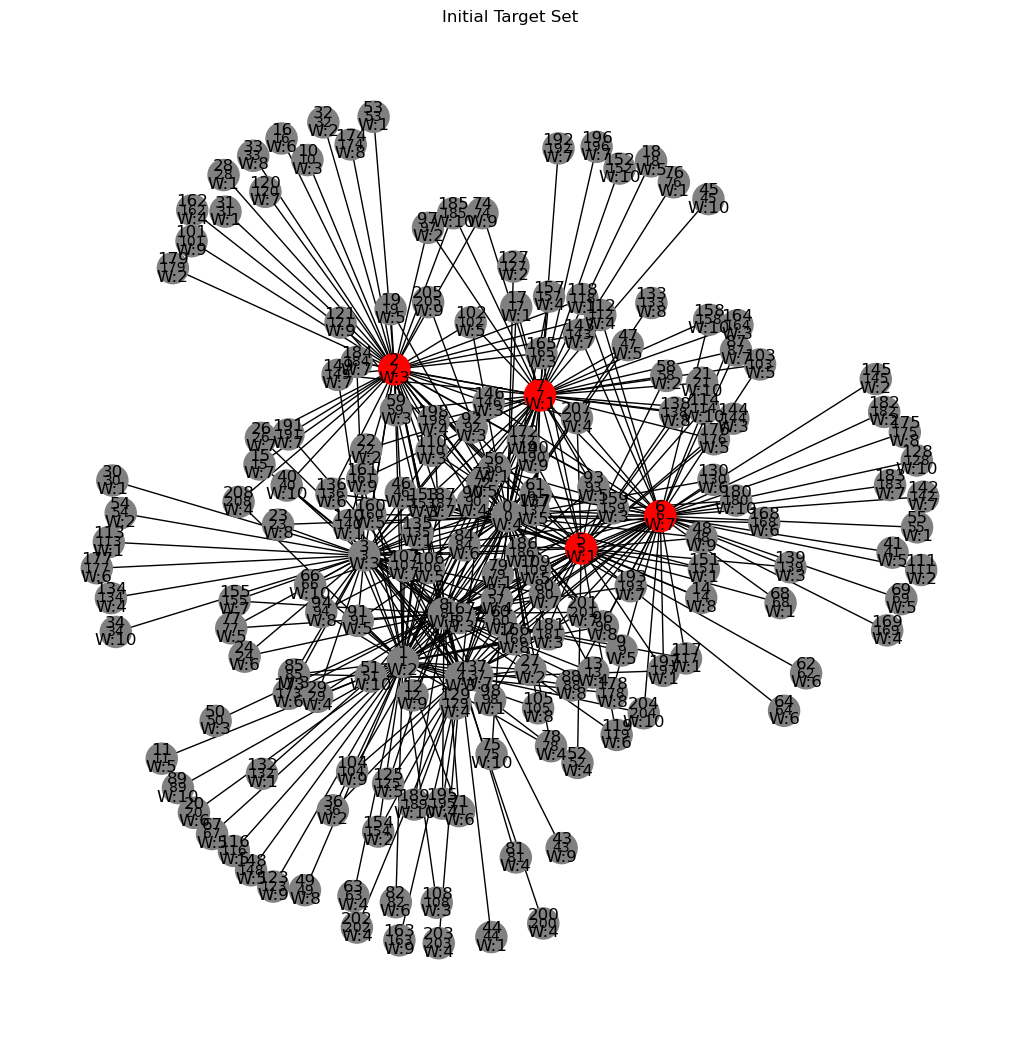

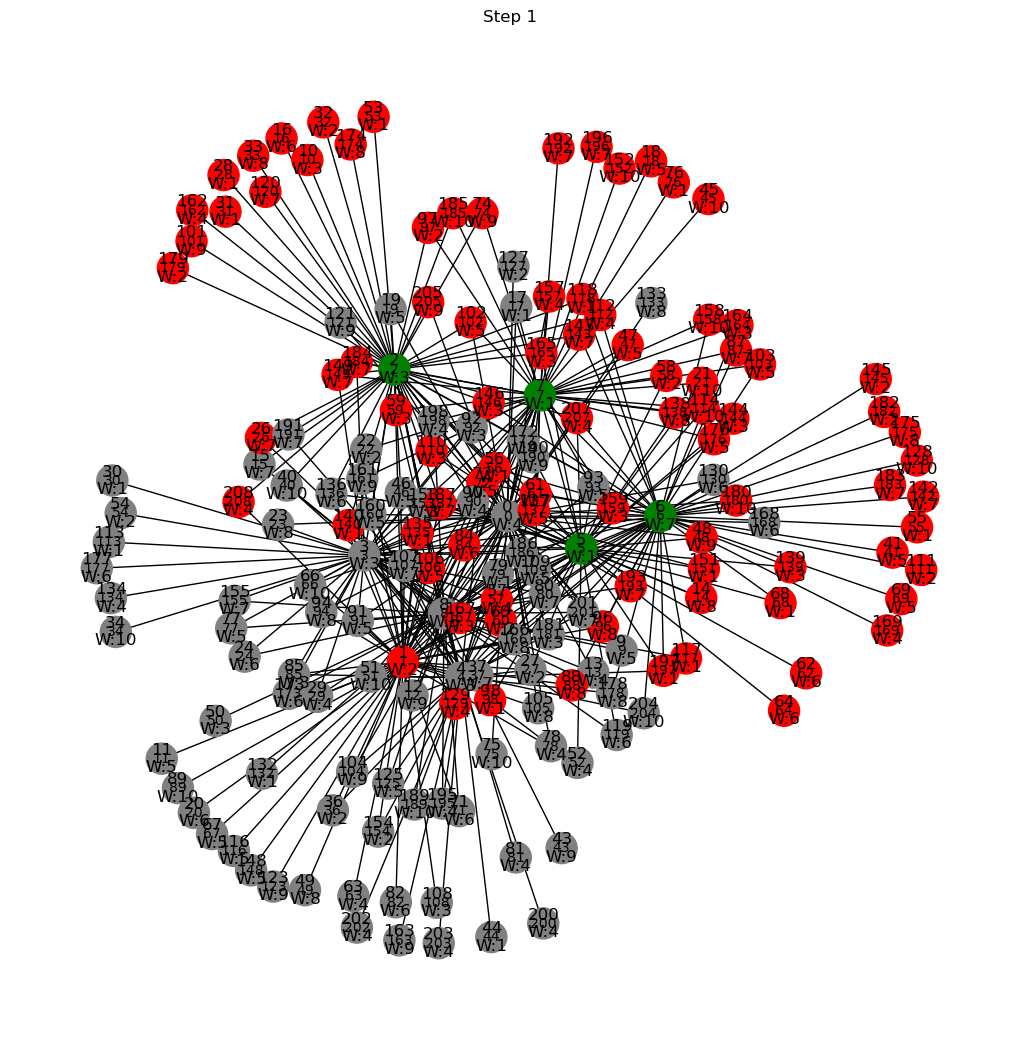

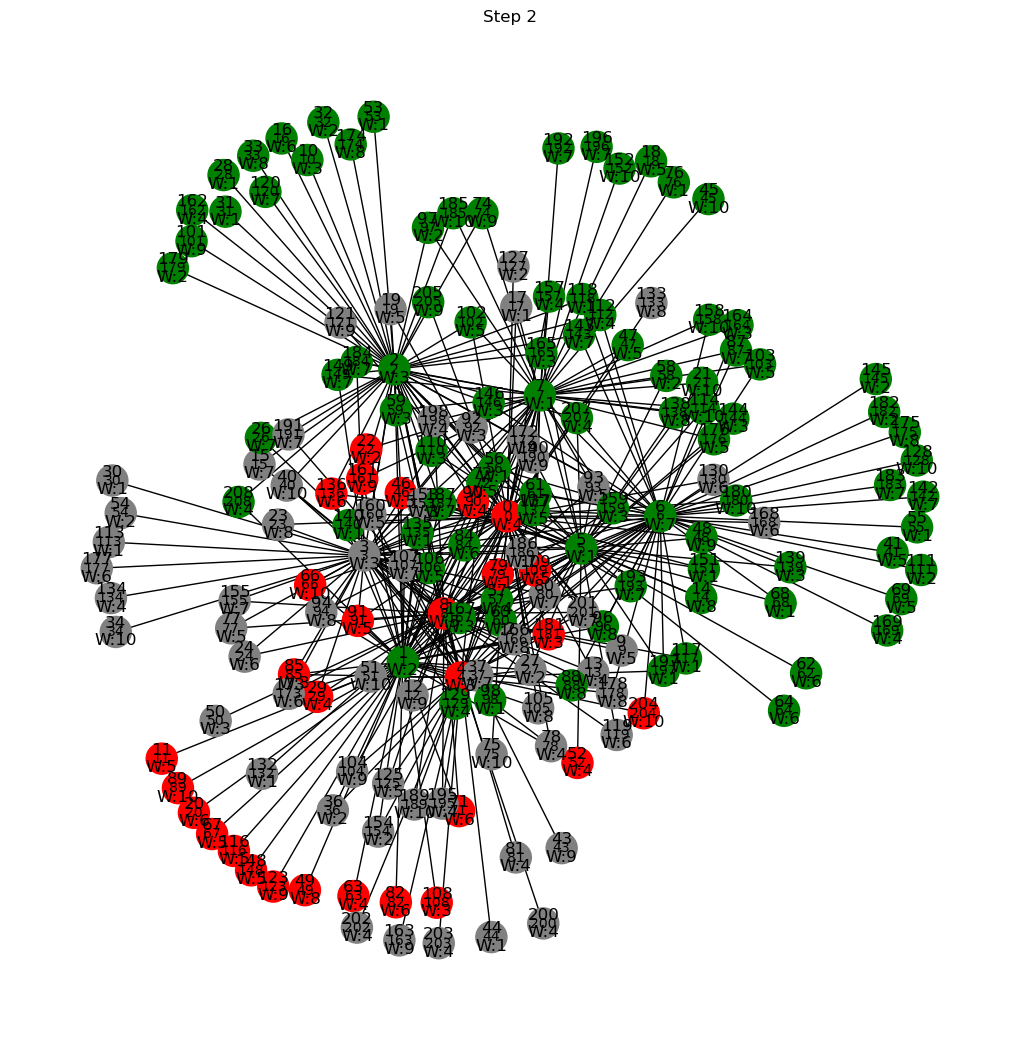

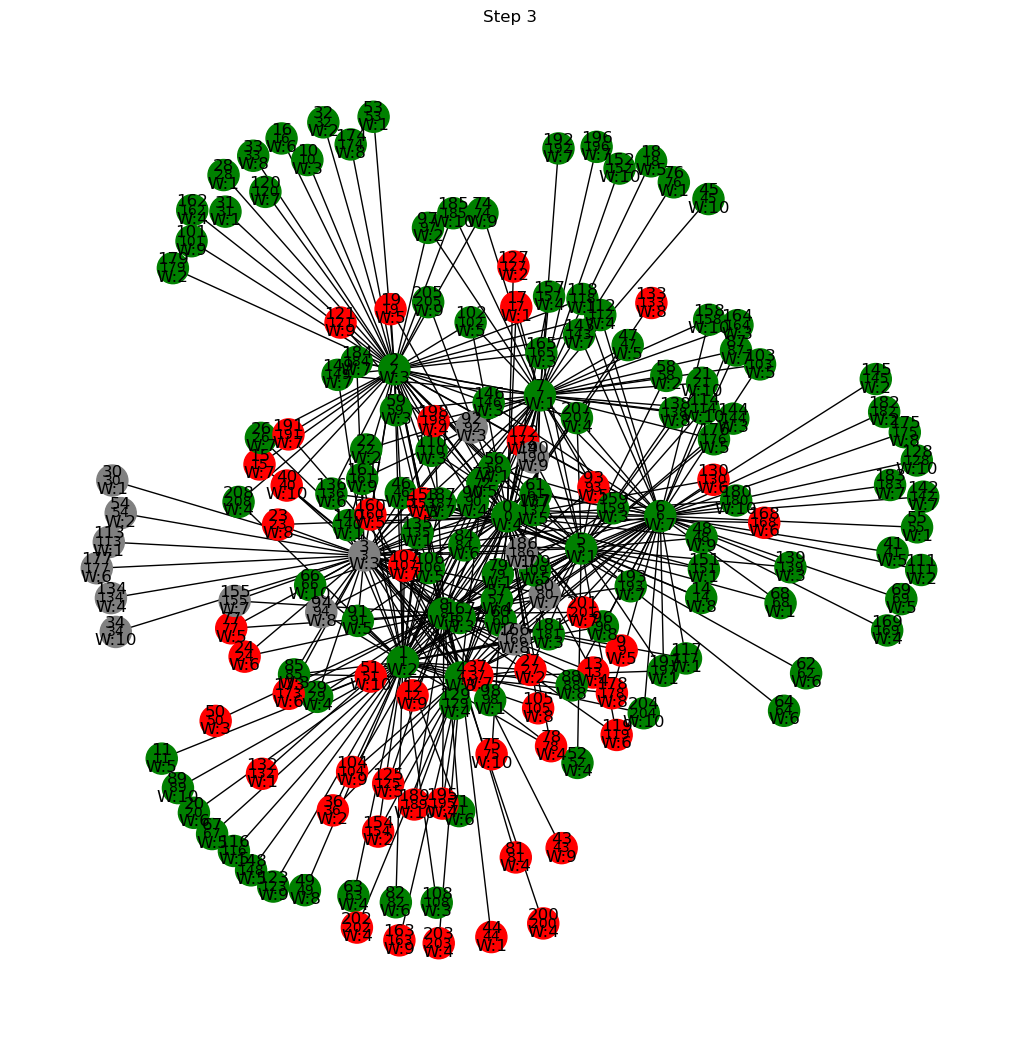

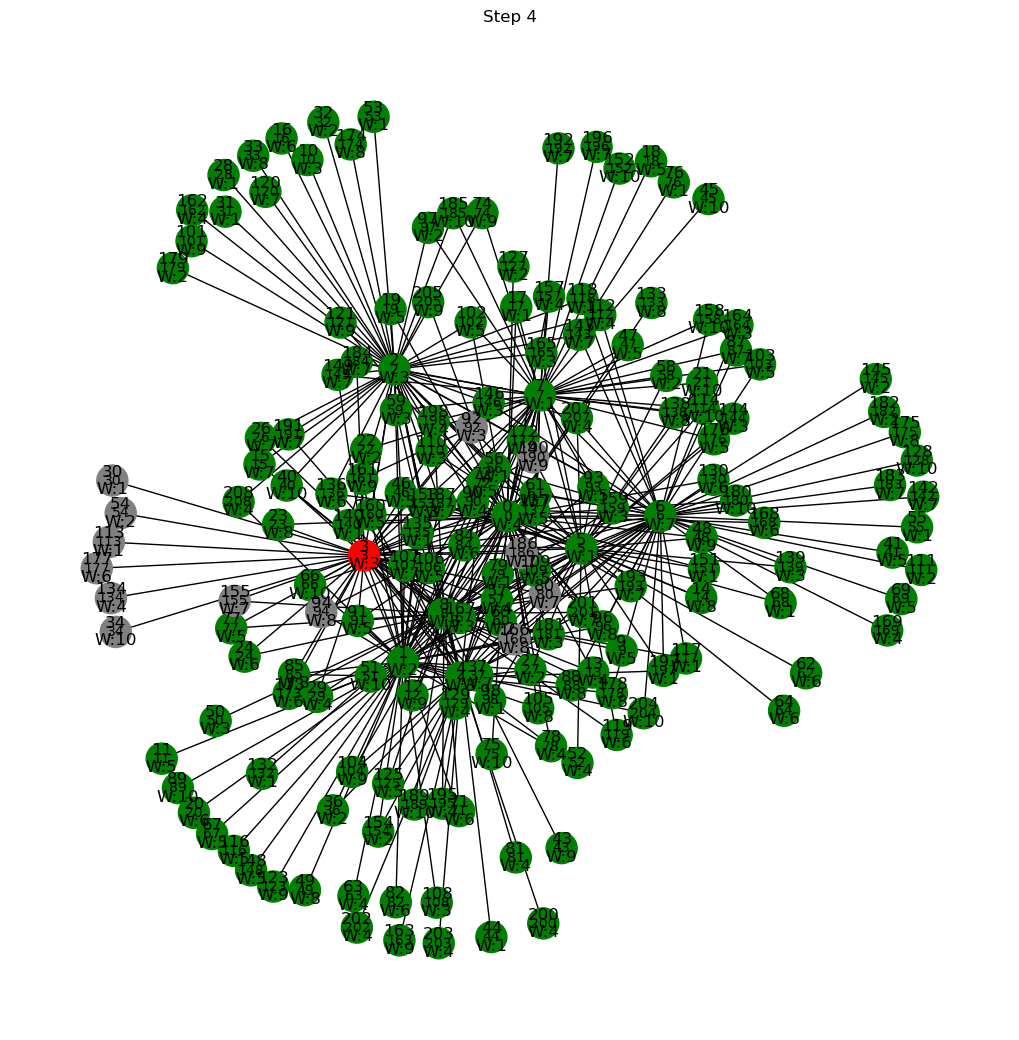

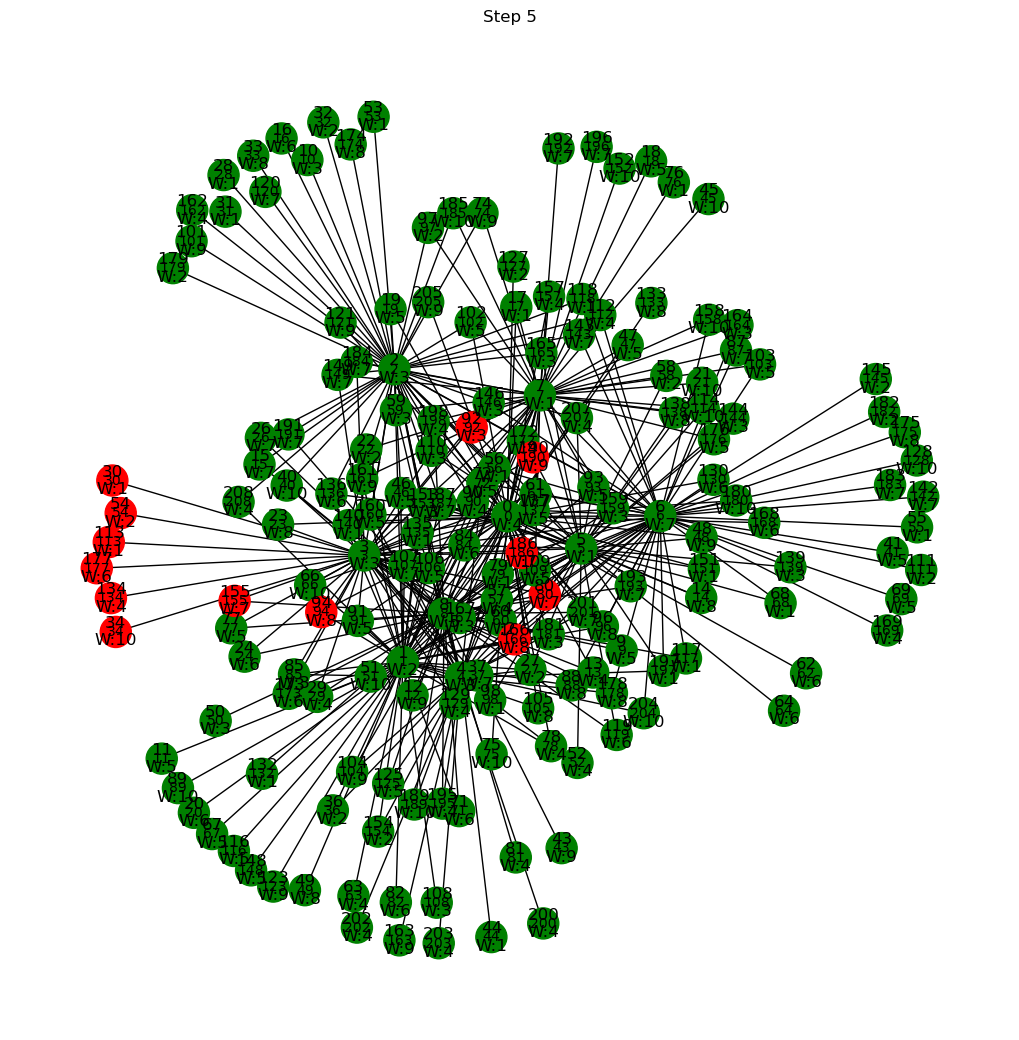

Visualization took 3.7688 seconds
Total execution time: 3.8092 seconds


In [1]:
"""
This code is written in a Jupyter Notebook Python environment. 
To ensure successful execution, please try to use a similar environment configuration. 
Running this code will generate the Vertex Cover Set, Independent Set, 
Thresholds for each node, weights, edges included in the graph, 
remaining nodes and their thresholds, weights after applying the reduction rules, 
as well as the minimal target set and the visualization of the entire graph activation process.
"""
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

class TargetSetSelectionWithWeights:
    """
    Adjust the number of nodes in the independent set by changing the value of num_nodes, 
    and control the number of nodes in the vertex cover set by changing the value of tau. 
    For example, num_nodes=104 and tau=4 means that the independent set contains 100 nodes 
    and the vertex cover set contains 4 nodes. 
    """
    def __init__(self, num_nodes=209, tau=9, edge_prob=0.2):
        """
        Initialize the class with the given number of nodes, size of the vertex cover set (tau),
        and probability of edges between independent set nodes and vertex cover set nodes.
        It creates the initial sets and graph, and assigns random thresholds and weights to nodes.
        
        Parameters:
        - num_nodes: Total number of nodes in the graph.
        - tau: Number of nodes in the vertex cover set.
        - edge_prob: Probability of an edge existing between a node in the independent set and a node in the vertex cover set.
        """
        self.num_nodes = num_nodes
        self.tau = tau
        self.edge_prob = edge_prob
        self.vertex_cover_set = set(range(self.tau))
        self.independent_set = set(range(self.tau, self.num_nodes))
        self.G = self._generate_graph()  # Generate the graph
        self.thresholds = {node: random.randint(1, self.G.degree[node]) for node in self.G.nodes()}
        self.weights = {node: random.randint(1, 10) for node in self.G.nodes()}

    def _generate_graph(self):
        """
        Generate a graph where nodes in the vertex cover set are fully connected,
        and nodes in the independent set are connected to the vertex cover set nodes with a given probability.
        """
        G = nx.Graph()

        # Add edges between all pairs of nodes in the vertex cover set
        for i in range(self.tau):
            for j in range(i + 1, self.tau):
                G.add_edge(i, j)

        # Add edges between independent set nodes and vertex cover set nodes with a certain probability
        for node in self.independent_set:
            for cover_node in self.vertex_cover_set:
                if random.random() < self.edge_prob:
                    G.add_edge(node, cover_node)

        return G

    def _apply_reduction_rules(self):
        """
        Apply reduction rules to simplify the graph. This involves removing nodes whose thresholds are either 0
        (no activation needed) or greater than their degree (impossible to activate). The thresholds of neighboring nodes are adjusted accordingly.
        """
        changed = True
        while changed:
            changed = False
            nodes_to_remove = []
            for node in list(self.G.nodes):
                if self.thresholds[node] == 0 or self.thresholds[node] > self.G.degree[node]:
                    nodes_to_remove.append(node)

            if nodes_to_remove:
                changed = True
                for node in nodes_to_remove:
                    neighbors = list(self.G.neighbors(node))
                    self.G.remove_node(node)
                    for neighbor in neighbors:
                        if neighbor in self.thresholds:
                            self.thresholds[neighbor] -= 1

    def _find_minimum_target_set(self):
        """
        Find the minimal target set using a greedy approach. This method iteratively selects the node 
        that maximizes the weighted activation of other nodes until the entire graph is activated.
        """
        candidates = list(self.G.nodes)
        target_set = set()
        activated = set()

        while len(activated) < len(self.G.nodes):
            best_node = None
            max_weighted_activation = 0

            # Find the node that provides the maximum weighted activation
            for node in candidates:
                if node not in activated:
                    temp_activated = self._simulate_activation(activated.union({node}))
                    weighted_activation = sum(self.weights[n] for n in temp_activated)
                    if weighted_activation > max_weighted_activation:
                        max_weighted_activation = weighted_activation
                        best_node = node

            target_set.add(best_node)
            activated = self._simulate_activation(activated.union({best_node}))

        return target_set

    def _simulate_activation(self, initial_set):
        """
        Simulate the activation process starting from an initial set of activated nodes.
        The process continues until no new nodes can be activated.
        
        Parameters:
        - initial_set: The initial set of activated nodes.
        
        Returns:
        - activated: The set of all activated nodes after the process completes.
        """
        activated = set(initial_set)
        newly_activated = True

        while newly_activated:
            newly_activated = False
            for node in list(self.G.nodes):
                if node not in activated and len(set(self.G.neighbors(node)).intersection(activated)) >= self.thresholds[node]:
                    activated.add(node)
                    newly_activated = True

        return activated

    def _verify_target_set(self, target_set):
        """
        Verify if the given target set can activate the entire graph.
        
        Parameters:
        - target_set: The set of nodes selected as the target set.
        
        Returns:
        - Boolean: True if the target set activates the entire graph, False otherwise.
        """
        activated = self._simulate_activation(set(target_set))
        return len(activated) == len(self.G.nodes)

    def _visualize_activation(self, steps, target_set):
        """
        Visualize the activation process, showing the progression of node activation at each step.
        The initial target set and subsequent steps are visualized with different colors.
        
        Parameters:
        - steps: A list of sets, where each set contains the nodes activated at each step.
        - target_set: The set of nodes in the initial target set.
        """
        pos = nx.spring_layout(self.G)
        all_active_set = set(target_set)

        # Draw the initial target set
        plt.figure(figsize=(10, 10))
        node_colors = []
        for node in self.G.nodes():
            if node in target_set:
                node_colors.append('red')
            else:
                node_colors.append('gray')
        nx.draw(self.G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10)
        nx.draw_networkx_labels(self.G, pos, labels={node: f'{node}\nW:{self.weights[node]}' for node in self.G.nodes()})
        plt.title(f'Initial Target Set')
        plt.show()

        # Draw the nodes activated at each step
        for step_num, step in enumerate(steps):
            all_active_set.update(step)
            plt.figure(figsize=(10, 10))
            node_colors = []
            for node in self.G.nodes():
                if node in step:
                    node_colors.append('red')
                elif node in all_active_set:
                    node_colors.append('green')
                else:
                    node_colors.append('gray')
            nx.draw(self.G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10)
            nx.draw_networkx_labels(self.G, pos, labels={node: f'{node}\nW:{self.weights[node]}' for node in self.G.nodes()})
            plt.title(f'Step {step_num + 1}')
            plt.show()
        
    def _draw_graph(self, activated, pos, title):
        """
        Draw the graph with activated nodes highlighted in green.
        
        Parameters:
        - activated: The set of nodes that are activated.
        - pos: The layout position of the nodes.
        - title: The title of the plot.
        """
        node_colors = []
        for node in self.G.nodes:
            if node in activated:
                node_colors.append("green")
            else:
                node_colors.append("gray")

        nx.draw(self.G, pos, with_labels=True, node_color=node_colors, node_size=500)
        plt.title(title)
        plt.show()

    def run(self):
        """
        Execute the full process: generate the graph, apply reduction rules, 
        find the minimum target set, verify the target set, and visualize the activation process.
        """
        print("Vertex Cover Set:", self.vertex_cover_set)
        print("Independent Set:", self.independent_set)

        # Timing: Apply reduction rules
        graph_start_time = time.time()
        print("Applying reduction rules...")
        self._apply_reduction_rules()
        graph_end_time = time.time()
        print(f"Graph generated and reduction rules applied in {graph_end_time - graph_start_time:.4f} seconds")

        # Output graph information
        print("Thresholds:", self.thresholds)
        print("Weights:", self.weights)
        print("Edges:", list(self.G.edges()))

        print("Reduced Graph:")
        print("Remaining Nodes:", list(self.G.nodes()))
        print("Thresholds after Reduction:", {k: self.thresholds[k] for k in self.G.nodes()})
        print("Weights after Reduction:", {k: self.weights[k] for k in self.G.nodes()})

        # Timing: Find minimum target set
        find_start_time = time.time()
        print("Finding minimum target set with weights...")
        target_set = self._find_minimum_target_set()
        find_end_time = time.time()
        print(f"Greedy Target Set Found in {find_end_time - find_start_time:.4f} seconds")
        print("Greedy Target Set:", target_set)

        # Timing: Verify target set
        verify_start_time = time.time()
        print("Verifying target set...")
        if self._verify_target_set(target_set):
            print("Target set is valid.")
        else:
            print("Target set is not valid.")
        verify_end_time = time.time()
        print(f"Target set verification took {verify_end_time - verify_start_time:.4f} seconds")

        # Timing: Visualize activation process
        visualize_start_time = time.time()
        print("Visualizing activation process...")
        activated = set(target_set)
        step = 1
        steps = []
        while len(activated) < len(self.G.nodes()):
            new_activated = set()
            for node in self.G.nodes():
                if node not in activated and len(set(self.G.neighbors(node)).intersection(activated)) >= self.thresholds[node]:
                    new_activated.add(node)
            activated.update(new_activated)
            steps.append(new_activated)
            print(f"Step {step} activated nodes:", new_activated)
            step += 1
        self._visualize_activation(steps, target_set)
        visualize_end_time = time.time()
        print(f"Visualization took {visualize_end_time - visualize_start_time:.4f} seconds")

        # Total execution time
        total_end_time = time.time()
        print(f"Total execution time: {total_end_time - graph_start_time:.4f} seconds")

if __name__ == "__main__":
    tss = TargetSetSelectionWithWeights()
    tss.run()